In [1]:
#|hide
## Standard libraries
import os
import math
import numpy as np
import time
from fastcore.all import *
from nbdev.showdoc import *

# Configure environment
os.environ['XLA_PYTHON_CLIENT_PREALLOCATE']='false' # Tells Jax not to hog all of the memory to this process.

## Imports for plotting
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('svg', 'pdf') # For export
from matplotlib.colors import to_rgba
import seaborn as sns
sns.set()

## Progress bar
from tqdm.auto import tqdm, trange

## project specifics
import diffusion_curvature
import pygsp
import jax
import jax.numpy as jnp
jax.devices()

from diffusion_curvature.graphs import *
from diffusion_curvature.datasets import *
from diffusion_curvature.core import *
from diffusion_curvature.utils import *
from diffusion_curvature.comparison_space import *

%load_ext autoreload
%autoreload 2

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


# 7 Experiments with Diffusion Ricci Curvature
> Testing the bounds of the method

**Hypothesis**: Stuff will happen

## Machinery

First here's an example usage:

In [3]:
from diffusion_curvature.ricci import DiffusionRicciCurvature
import graphtools

In [4]:
show_doc(DiffusionRicciCurvature)

---

### DiffusionRicciCurvature

>      DiffusionRicciCurvature (laziness_method:Literal['Entropic','Wasserstein'
>                               ,'DiffusionVolume']='Entropic',
>                               allow_self_loops:bool=False)

Initialize self.  See help(type(self)) for accurate signature.

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| laziness_method | Literal | Entropic | Method to use for laziness computation |
| allow_self_loops | bool | False | Whether to allow self-loops in graph. |

In [5]:
X_torus, ks_torus = torus(200)
G = graphtools.Graph(X_torus, anisotropy=1, knn=15, decay=None).to_pygsp()
A = jnp.array(G.W.todense(), dtype=jnp.float32,)

In [6]:
DRC = DiffusionRicciCurvature()
R = DRC.fit_transform(A, 25)

  0%|          | 0/200 [00:00<?, ?it/s]

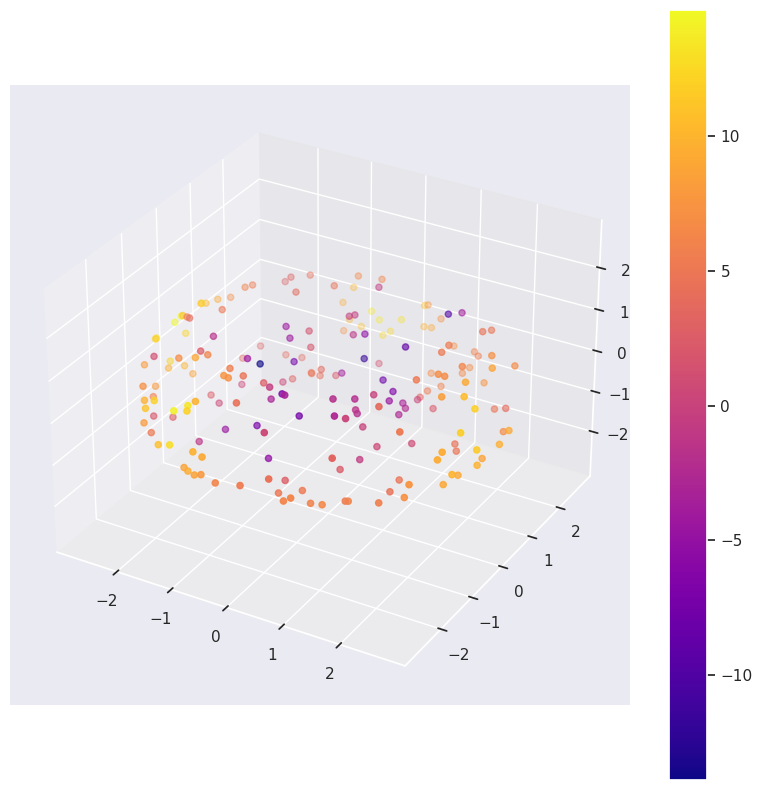

In [7]:
plot_3d(X_torus, DRC.ks, colorbar=True)

# Results

## With Self Loops

## Example Usage

# Conclusion